# Data Preparation (Cleaning the Dataset)
Data cleaning is a fundamental step in any data analysis or machine learning project. Raw datasets often contain missing values, duplicates, incorrect formats, or inconsistencies that can lead to inaccurate conclusions and unreliable models. Cleaning the data ensures that we have high-quality, structured, and reliable information for analysis.

## Why is Data cleaning important?
1. **Improves Accuracy** – Ensures that data-driven decisions are based on correct information.
2. **Enhances Efficiency** – Reduces errors and makes data analysis smoother.
4. **Prepares Data for Modeling** – Clean data leads to better machine learning performance.
5. **Removes Duplicates & Outliers** – Prevents misleading insights.
6. **Standardizes Data Format** – Ensures consistency across all records.

## Steps

1. **Load the Dataset** – Read the CSV file and inspect its structure.
2. **Convert Data Types** – Ensure numerical, categorical, and date fields are correctly formatted.  
3. **Check for Missing Values** – Identify and handle missing data
4. **Remove Duplicates** – Ensure unique records.
5. **Handle Inconsistent Formatting** – Standardize text formats and column names
6. **Detect and Handle Outliers** – Remove or adjust extreme values that may distort the analysis.





In [ ]:
# Step 1 (Importing Libraries and Loading the Dataset)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv(r"Most Streamed Spotify Songs 2024.csv", encoding = "latin1")

print(df.dtypes)


Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [923]:
# Step 2 (Convert Datatypes to its right format)
# Some of the columns will have their datatypes get adjusted in the "Missing values" step 

# 1. Convert 'Release Date' from object to datetime
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# 2. Convert columns that should be numeric but are stored as object
columns_to_convert = [
    "All Time Rank",
    "Spotify Playlist Count",
    "Spotify Playlist Reach",
    "YouTube Playlist Reach",
    "AirPlay Spins",
    "SiriusXM Spins",
    "Pandora Streams",
    "Pandora Track Stations",
    "Soundcloud Streams",
    "Shazam Counts"
]

for col in columns_to_convert:
    if df[col].dtype == "object":
        # Remove commas if present and convert to float (or int if appropriate)
        df[col] = pd.to_numeric(df[col].str.replace(",", ""), errors="coerce")


In [925]:
# Step 3 (Checking for and Handling missing values)
print(df.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

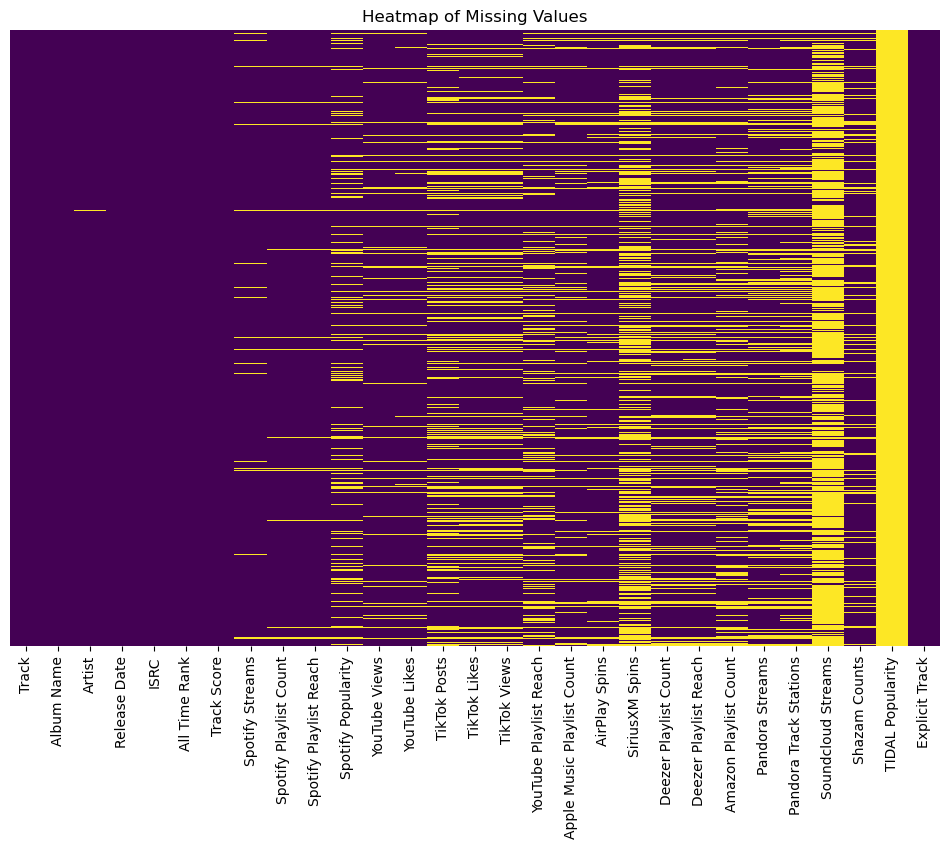

In [927]:
# The heatmap visualizes the location of NaN values across the dataset,
# making it easier to identify patterns or areas that require further cleaning.

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create a heatmap of null values; each cell is colored if it is NaN
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

# The color Yellow indicates null values

plt.title("Heatmap of Missing Values")
plt.show()


In [ ]:
df = df.dropna(subset = ["Artist"]) # After some inspection, Rows with missing artist names were dropped due to extensive missing 
# or nonsensical values, ensuring data integrity and accuracy in analysis (5 rows).

df = df.dropna(subset=["Spotify Streams"]) # Rows with missing Spotify Streams were dropped due to excessive missing values 
# across multiple columns, making them unreliable for analysis.

df["Spotify Playlist Count"] = df["Spotify Playlist Count"].fillna(0) # Replaced null values with 0 because a missing value in 
# "Spotify Playlist Count" means the track is not featured in any playlists. Setting it to 0 ensures consistency in the dataset.

df["Spotify Playlist Reach"] = df["Spotify Playlist Reach"].fillna(0) # Replaced null values with 0 in "Spotify Playlist Reach" 
# because a missing value likely means the track is not featured in any playlists or its reach data is unavailable. While a track 
# could be in a playlist with zero reach (e.g., no followers or private playlists), setting NaNs to 0 ensures consistency and 
# avoids issues in analysis.

# Convert "Spotify Streams" to numeric only if it's not already
if df["Spotify Streams"].dtype == "object":
    df["Spotify Streams"] = df["Spotify Streams"].str.replace(",", "").astype(float)
# Convert "Spotify Popularity" to numeric (just in case of non-numeric values)
df["Spotify Popularity"] = pd.to_numeric(df["Spotify Popularity"], errors="coerce")
median_popularity = df["Spotify Popularity"].median()
# Fill missing values based on Spotify Streams
df.loc[(df["Spotify Streams"] > df["Spotify Streams"].median()) & (df["Spotify Popularity"].isna()), "Spotify Popularity"] = median_popularity
df.loc[(df["Spotify Streams"] <= df["Spotify Streams"].median()) & (df["Spotify Popularity"].isna()), "Spotify Popularity"] = 0
# Handling missing values in "Spotify Popularity" based on streaming data  
# - Tracks with **high Spotify Streams** are more likely to be popular, so we fill their null popularity scores with the median value.  
# - Tracks with **low Spotify Streams** are less likely to be popular, so we fill their null popularity scores with 0.  
# - This ensures a **realistic and data-driven approach** rather than assuming missing values are random, improving data integrity.

# Convert "YouTube Views" to numeric only if it's not already
if df["YouTube Views"].dtype == "object":
    df["YouTube Views"] = df["YouTube Views"].str.replace(",", "").astype(float)
# Convert YouTube Views column to numeric in case there are any non-numeric values
df["YouTube Views"] = pd.to_numeric(df["YouTube Views"], errors="coerce")
# Calculate the median YouTube Views
median_youtube_views = df["YouTube Views"].median()
# Fill only the null values based on Spotify Streams
df.loc[df["YouTube Views"].isna() & (df["Spotify Streams"] > df["Spotify Streams"].median()), "YouTube Views"] = median_youtube_views
df.loc[df["YouTube Views"].isna() & (df["Spotify Streams"] <= df["Spotify Streams"].median()), "YouTube Views"] = 0
# Missing YouTube Views were handled by considering Spotify Streams as an indicator of popularity.
# - If a track has high Spotify Streams, it likely has YouTube views, so NaNs were replaced with the median YouTube Views.
# - If a track has low Spotify Streams, it may not be on YouTube or has very few views, so NaNs were replaced with 0.
# This approach ensures consistency while preserving meaningful data.

# Convert "YouTube Likes" to numeric only if it's not already and removing the commas
if df["YouTube Likes"].dtype == "object":
    df["YouTube Likes"] = df["YouTube Likes"].str.replace(",", "").astype(float)
# Convert YouTube Likes column to numeric in case there are any non-numeric values
df["YouTube Likes"] = pd.to_numeric(df["YouTube Likes"], errors="coerce")
# Calculate the median YouTube Likes
median_youtube_likes = df["YouTube Likes"].median()
# Fill only the null values based on YouTube Views
df.loc[df["YouTube Likes"].isna() & (df["YouTube Views"] > df["YouTube Views"].median()), "YouTube Likes"] = median_youtube_likes
df.loc[df["YouTube Likes"].isna() & (df["YouTube Views"] <= df["YouTube Views"].median()), "YouTube Likes"] = 0
# Missing values were filled based on YouTube Views:
# - If the track has high YouTube Views, it gets the median YouTube Likes.
# - If the track has low YouTube Views, it gets 0 YouTube Likes.
# This maintains data consistency and ensures missing values are handled logically.

# Convert "TikTok Posts" to numeric only if it's not already numeric
if df["TikTok Posts"].dtype == "object":
    df["TikTok Posts"] = df["TikTok Posts"].str.replace(",", "").astype(float)
# Ensure the conversion with pd.to_numeric to catch any remaining non-numeric values
df["TikTok Posts"] = pd.to_numeric(df["TikTok Posts"], errors="coerce")
df["TikTok Posts"] = df["TikTok Posts"].fillna(0) # Handling null values in the column "TikTok Posts" by assigning these
# values to zero, since not all songs are used in TikTok Posts
# Ensure TikTok Likes and Views are 0 where TikTok Posts is 0 (this step is done again in cleaning the "TikTok Views" column
# for clarification)
df.loc[df["TikTok Posts"] == 0, ["TikTok Likes", "TikTok Views"]] = 0 # If a track has 0 TikTok Posts, it logically means 
# there are no associated Likes or Views. This ensures consistency in the dataset and prevents misleading engagement data.

# Convert "TikTok Views" to numeric only if it's not already
if df["TikTok Views"].dtype == "object":
    df["TikTok Views"] = df["TikTok Views"].str.replace(",", "").astype(float)
# Ensure "TikTok Views" is numeric, coercing any problematic values
df["TikTok Views"] = pd.to_numeric(df["TikTok Views"], errors="coerce")
# Calculate the median of TikTok Views
median_tiktok_views = df["TikTok Views"].median()
# Fill missing TikTok Views based on TikTok Posts:
# - If a track has posts (i.e. > 0) but missing Views, assume median views.
# - If a track has 0 posts, assign 0 views.
df.loc[df["TikTok Views"].isna() & (df["TikTok Posts"] > 0), "TikTok Views"] = median_tiktok_views
df.loc[df["TikTok Views"].isna() & (df["TikTok Posts"] == 0), "TikTok Views"] = 0
# Missing values were filled based on TikTok Posts:
# - If a track has TikTok Posts but missing Views, we assign the median value,
# - assuming that such tracks typically garner a moderate number of views.
# - If a track has 0 posts, we set the views to 0.
# - these values might not be the most accurate however, we are only adjusting about 20 rows so it won't affect the analysis

# Convert "TikTok Likes" to numeric only if it's not already
if df["TikTok Likes"].dtype == "object":
    df["TikTok Likes"] = df["TikTok Likes"].str.replace(",", "").astype(float)
# Ensure "TikTok Likes" is numeric
df["TikTok Likes"] = pd.to_numeric(df["TikTok Likes"], errors="coerce")
# Calculate the median of TikTok Likes
median_tiktok_likes = df["TikTok Likes"].median()
# Fill missing TikTok Likes based on TikTok Views:
# - If a track has high TikTok Views (above the median), fill missing Likes with the median likes.
# - If a track has low TikTok Views (at or below the median), set missing Likes to 0.
df.loc[df["TikTok Likes"].isna() & (df["TikTok Views"] > median_tiktok_views), "TikTok Likes"] = median_tiktok_likes
df.loc[df["TikTok Likes"].isna() & (df["TikTok Views"] <= median_tiktok_views), "TikTok Likes"] = 0
# Missing values were filled based on TikTok Posts:
# - Tracks with high TikTok Views (above the median) are assumed to have engagement,
#   so missing likes are replaced with the median likes.
# - Tracks with low TikTok Views (at or below the median) are assumed to have little engagement, so missing likes are set to 0.
# This approach ensures that the estimation for missing likes is directly informed by the available views data.

# Fill missing YouTube Playlist Reach values with 0 since there is no other attributes that directly relates to 
# "Youtube Playlist Reach"
df["YouTube Playlist Reach"] = df["YouTube Playlist Reach"].fillna(0)
# Filled missing values in "YouTube Playlist Reach" with 0, as a null value likely indicates that 
# the track is not featured in any YouTube playlists. This ensures 
# that the dataset accurately reflects that these tracks have no associated playlist reach.

# Fill missing values with 0, assuming a missing count means the track isn't featured on Apple Music playlists
df["Apple Music Playlist Count"] = df["Apple Music Playlist Count"].fillna(0)
# Missing values were filled with 0 since a missing count indicates that the track is not featured in any Apple Music playlists.
# We cannot use a median value for the nulls since we do not have any other column that directly relates to 
# "Apple Music Playlist Count". This is normal because not all Tracks have to exist in Apple Music playlists.

# Fill missing values with 0, assuming that a missing value means no AirPlay spins were recorded
df["AirPlay Spins"] = df["AirPlay Spins"].fillna(0)
# Missing values were replaced with 0, since a missing value indicates that no spins were recorded and no other 
# attributes directly relates to Airplay Spins for which we cannot use a median for the nulls.
# This approach maintains data consistency.

# Fill missing values with 0, assuming that a missing value means no spins were recorded on SiriusXM
df["SiriusXM Spins"] = df["SiriusXM Spins"].fillna(0)
# Filled the missing values with 0 under the assumption that a missing value indicates that no spins were recorded.
# No other columns directly relates to the values of "SiriusXM", therefore replacing the the nulls with 0 is a good approach.

# Fill missing values with 0, assuming that a missing value means the track is not featured in any Deezer playlists
df["Deezer Playlist Count"] = df["Deezer Playlist Count"].fillna(0)
# Missing values are replaced with 0 under the assumption that a missing count indicates the track is not included in any
# Deezer playlists.  No other columns directly relates to the values of "Deezer Playlist Count", therefore replacing the 
# the nulls with 0 is a good approach.

# Convert "Deezer Playlist Reach" to numeric only if it's not already numeric
if df["Deezer Playlist Reach"].dtype == "object":
    df["Deezer Playlist Reach"] = df["Deezer Playlist Reach"].str.replace(",", "").astype(float)
# Ensure conversion to numeric, coercing any non-numeric values to NaN
df["Deezer Playlist Reach"] = pd.to_numeric(df["Deezer Playlist Reach"], errors="coerce")
# For rows with nonzero Deezer Playlist Count but missing reach, fill with the median reach (calculated from rows where count > 0)
median_reach_nonzero = df.loc[df["Deezer Playlist Count"] > 0, "Deezer Playlist Reach"].median()
df.loc[(df["Deezer Playlist Count"] > 0) & (df["Deezer Playlist Reach"].isna()), "Deezer Playlist Reach"] = median_reach_nonzero
# For rows with 0 Deezer Playlist Count, ensure reach is 0
df.loc[(df["Deezer Playlist Count"] == 0) & (df["Deezer Playlist Reach"].isna()), "Deezer Playlist Reach"] = 0
# For tracks with a nonzero Deezer Playlist Count, a missing "Deezer Playlist Reach" indicates a data gap.
# We impute these missing values with the median reach calculated from tracks that have a nonzero count. this won't really
# affect the data since its only a couple of rows getting modified
# For tracks with a Deezer Playlist Count of 0, we set the reach to 0, assuming no exposure via playlists..

# Fill missing values with 0, assuming that a missing value indicates the track is not featured in any Amazon playlists
df["Amazon Playlist Count"] = df["Amazon Playlist Count"].fillna(0)

# Fill missing values with 0, assuming that a missing value indicates the track has no recorded Pandora streams
df["Pandora Streams"] = df["Pandora Streams"].fillna(0)

# Fill missing values with 0, assuming that a missing value indicates the track is not featured on any Pandora radio stations
df["Pandora Track Stations"] = df["Pandora Track Stations"].fillna(0)

# Fill missing values with 0, assuming that a missing value indicates no SoundCloud streams were recorded
df["Soundcloud Streams"] = df["Soundcloud Streams"].fillna(0)

# Fill missing values with 0, assuming that a missing value indicates that the track has no recorded Shazam counts
df["Shazam Counts"] = df["Shazam Counts"].fillna(0)

# Drop the "TIDAL Popularity" column since it contains mostly null values and adds no value to the analysis.
df = df.drop(columns=["TIDAL Popularity"])

# Now the dataset has no null values, they were removed or replaced as follows:
# - For some attributes, entire rows with critical missing values were removed.
# - For others, missing values were replaced with 0 when a missing value logically indicated an absence (e.g., no playlists).
# - In cases where missing values likely resulted from data collection issues (e.g., popularity metrics),
#   the median was used to impute a reasonable estimate.
# This case-dependent approach ensured that our dataset is both complete and accurately represents the underlying data.

In [931]:
print(df.isnull().sum())

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Soundcloud Streams            0
Shazam Counts                 0
Explicit Track                0
dtype: int64


In [933]:
# Step 4 (Removing Duplicate rows)
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows) # To see the duplicate rows

                 Track        Album Name         Artist Release Date  \
2449  Tennessee Orange  Tennessee Orange  Megan Moroney   2022-09-02   
2450  Tennessee Orange  Tennessee Orange  Megan Moroney   2022-09-02   
3447            Dembow            Dembow    Danny Ocean   2017-12-08   
3450            Dembow            Dembow    Danny Ocean   2017-12-08   

              ISRC  All Time Rank  Track Score  Spotify Streams  \
2449  TCAGJ2289254           2424         28.9      227893586.0   
2450  TCAGJ2289254           2424         28.9      227893586.0   
3447  USWL11700269           3441         23.3      579189526.0   
3450  USWL11700269           3441         23.3      579189526.0   

      Spotify Playlist Count  Spotify Playlist Reach  ...  AirPlay Spins  \
2449                 28139.0              12480714.0  ...       129172.0   
2450                 28139.0              12480714.0  ...       129172.0   
3447                 60397.0              11805084.0  ...         5406.0   

In [935]:
df = df.drop_duplicates() # To remove the duplicates 

In [ ]:
# Step 5 (Handling Inconsistent Formatting)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
# Standardizes the column names by:
# - Removing any extra whitespace at the beginning or end,
# - Converting all characters to lowercase,
# - Replacing spaces with underscores.
# This ensures that the column names are consistent and are easier to reference.

In [939]:
# This will print any column names that still contain a space
print([col for col in df.columns if " " in col])

[]


In [ ]:
print(df.columns.tolist())
# To check that all white space from column names is removed, all spaces have been replaced with underscores and all characters are lower case


['track', 'album_name', 'artist', 'release_date', 'isrc', 'all_time_rank', 'track_score', 'spotify_streams', 'spotify_playlist_count', 'spotify_playlist_reach', 'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts', 'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach', 'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins', 'deezer_playlist_count', 'deezer_playlist_reach', 'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations', 'soundcloud_streams', 'shazam_counts', 'explicit_track']


In [ ]:
# Check for leftover leading or trailing whitespace in string columns
whitespace_exists = any(
    df[col].map(lambda x: isinstance(x, str) and (x != x.strip())).any()
    for col in df.select_dtypes(include="object").columns
)
print("Any leftover whitespace in records:", whitespace_exists)

Any leftover whitespace in records: False


In [965]:
# To print the columns with leading or trailing white space
for col in df.select_dtypes(include="object").columns:
    bad_rows = df[df[col].map(lambda x: isinstance(x, str) and (x != x.strip()))]
    if not bad_rows.empty:
        print(f"Column '{col}' has rows with extra whitespace:")
        print(bad_rows[[col]])


In [ ]:
# Remove leading or trailing whitespace from all string cells in the DataFrame
df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x) 
              if col.dtype == "object" else col)

# Re-run the 2 codes above after this one to test if the white space in the cells is removed or not

In [949]:
# Extra step (Adding a new column based on "spotify_popularity")
# The column is categorical (not popular, somewhat popular, popular, very popular) 
# Each category will represent a level so we can make it numerical
# 0-24   -> not popular  -> level 0
# 25-49  -> somewhat popular -> level 1
# 50-74  -> popular      -> level 2
# 75-100 -> very popular -> level 3

def assign_spotify_popularity_level(popularity):
    if popularity < 25:
        return 0
    elif popularity < 50:
        return 1
    elif popularity < 75:
        return 2
    else:
        return 3
        
df["spotify_popularity_level"] = df["spotify_popularity"].apply(assign_spotify_popularity_level)

In [ ]:
# Step 6 (Detecting and Handling Outliers)

# For this dataset, large values aren't really considered outliers since its alright for some rows to 
# have extreme values (e.g., Spotify Streams for a song can have up to 4 billion streams) however, below
# is a code for handling outliers as an example

# Get a list of numeric columns (float and int)
# numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Loop through each numeric column and remove rows with outlier values
#for col in numeric_cols:
    #Q1 = df[col].quantile(0.25)
    #Q3 = df[col].quantile(0.75)
    #IQR = Q3 - Q1
    #lower_bound = Q1 - 1.5 * IQR
    #upper_bound = Q3 + 1.5 * IQR
    # Remove outliers by keeping only rows within the bounds
    #df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


# Lastly we will check for negative values and make sure to remove them
# Check for negative values in the 'spotify_streams' column
negatives = df[df["spotify_streams"] < 0]
print("Negative values in Spotify Streams:", negatives)

# Remove rows where 'spotify_streams' is negative
df = df[df["spotify_streams"] >= 0]
# There is no negative values so no rows will be removed

Negative values in Spotify Streams: Empty DataFrame
Columns: [track, album_name, artist, release_date, isrc, all_time_rank, track_score, spotify_streams, spotify_playlist_count, spotify_playlist_reach, spotify_popularity, youtube_views, youtube_likes, tiktok_posts, tiktok_likes, tiktok_views, youtube_playlist_reach, apple_music_playlist_count, airplay_spins, siriusxm_spins, deezer_playlist_count, deezer_playlist_reach, amazon_playlist_count, pandora_streams, pandora_track_stations, soundcloud_streams, shazam_counts, explicit_track, spotify_popularity_level]
Index: []

[0 rows x 29 columns]


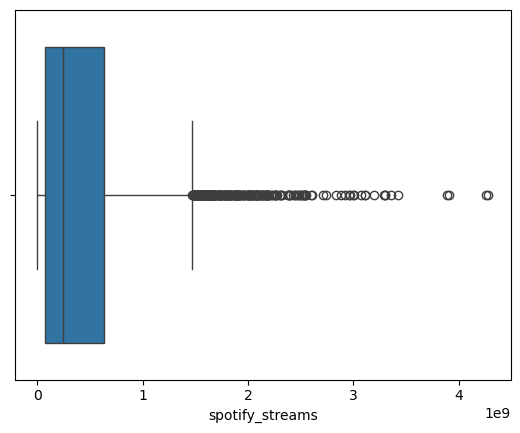

In [953]:
# Here we use a box plot to demonstrate, the 2 large values on the far right are true values 
# since some songs have lots of streams 
sns.boxplot(x='spotify_streams', data=df)
plt.show()

In [955]:
# Extra Step (Re-ordering the Columns based on logical groupings)

new_order = [
    # Identification & Metadata
    "track", "album_name", "artist", "release_date", "isrc",
    # Ranking & Scores
    "all_time_rank", "track_score",
    # Spotify Metrics
    "spotify_streams", "spotify_playlist_count", "spotify_playlist_reach", "spotify_popularity", "spotify_popularity_level",
    # YouTube Metrics
    "youtube_views", "youtube_likes", "youtube_playlist_reach",
    # TikTok Metrics
    "tiktok_posts", "tiktok_likes", "tiktok_views",
    # Apple Music Metrics
    "apple_music_playlist_count",
    # Radio Spins
    "airplay_spins", "siriusxm_spins",
    # Deezer Metrics
    "deezer_playlist_count", "deezer_playlist_reach",
    # Amazon Metrics
    "amazon_playlist_count",
    # Pandora Metrics
    "pandora_streams", "pandora_track_stations",
    # Other Streaming Platforms
    "soundcloud_streams", "shazam_counts",
    # Additional Indicators
    "explicit_track"
]

# Reorder the DataFrame columns
df = df[new_order]

In [ ]:
# For this dataset, there isn't much to be aggregated since every row is about a different track from different albums and artists
# however, here is an example of grouping by artists since an Artist can have multiple tracks.

artist_summary = df.groupby("artist").agg({
    "spotify_streams": "mean",
    "spotify_playlist_count": "mean",
    "spotify_playlist_reach": "mean",
    "youtube_views": "mean",
    "tiktok_views": "mean"
}).reset_index()

print(artist_summary.head())

        artist  spotify_streams  spotify_playlist_count  \
0    $OHO BANI       54065563.0             7779.000000   
1  $uicideboy$      188605270.0            46010.555556   
2          &ME       34601626.0            34272.000000   
3     (G)I-DLE      219234613.0            20092.000000   
4       *NSYNC       69041864.0            10118.000000   

   spotify_playlist_reach  youtube_views  tiktok_views  
0            9.672092e+06   6.744201e+06  0.000000e+00  
1            6.602650e+06   7.677397e+07  6.274127e+07  
2            1.491486e+07   0.000000e+00  8.694440e+05  
3            9.513365e+06   3.013097e+08  5.635451e+08  
4            7.035846e+06   2.795194e+07  5.701336e+07  


In [961]:
# Lastly, to convert from a Dataframe to csv
df.to_csv("Most_Streams_Cleaned_last.csv", index=False, encoding="utf-8")

In [ ]:
# When reading the cleaned csv file, make sure to include parse dates so the datatype of the date column is correctly formatted
dfnew = pd.read_csv("Most_Streams_Cleaned_last.csv", parse_dates=["release_date"])
dfnew.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                          int64
track_score                          float64
spotify_streams                      float64
spotify_playlist_count               float64
spotify_playlist_reach               float64
spotify_popularity                   float64
spotify_popularity_level               int64
youtube_views                        float64
youtube_likes                        float64
youtube_playlist_reach               float64
tiktok_posts                         float64
tiktok_likes                         float64
tiktok_views                         float64
apple_music_playlist_count           float64
airplay_spins                        float64
siriusxm_spins                       float64
deezer_playlist_count                float64
deezer_pla